In [1]:
from nilearn.plotting import plot_surf

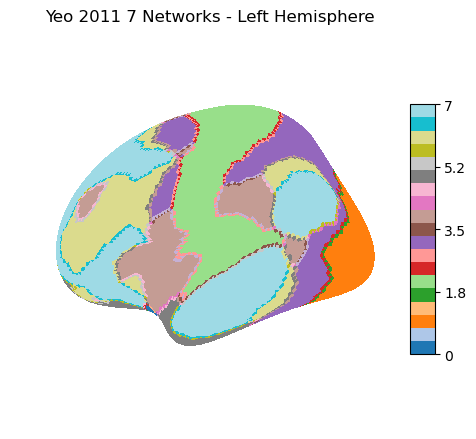

In [8]:
from nilearn import plotting
from nilearn.surface import load_surf_mesh, load_surf_data
from nilearn.datasets import fetch_surf_fsaverage
from nilearn.surface import vol_to_surf

# Load the fsaverage5 surface (used f
# Load the surface mesh for the left hemisphere
fsaverage = fetch_surf_fsaverage()
# Load the Yeo 2011 17 networks annotation file
surf_map = load_surf_data('lh.Yeo2011_7Networks_N1000.annot')  # Adjust path as needed

# Plot the surface with the Yeo networks
plotting.plot_surf(fsaverage.infl_left, surf_map=surf_map, hemi='left', view='lateral',
                   cmap='tab20', colorbar=True, title='Yeo 2011 7 Networks - Left Hemisphere')

# Show the plot
plotting.show()


/home/changbae/anaconda3/envs/fmrienv/lib/python3.9/site-packages/nilearn/plotting/surf_plotting.py:522: RuntimeWarning: invalid value encountered in divide
  data_copy /= (vmax - vmin)


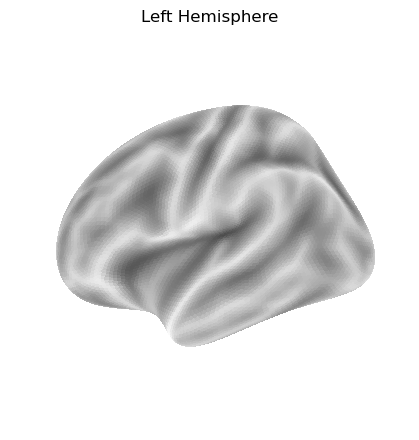

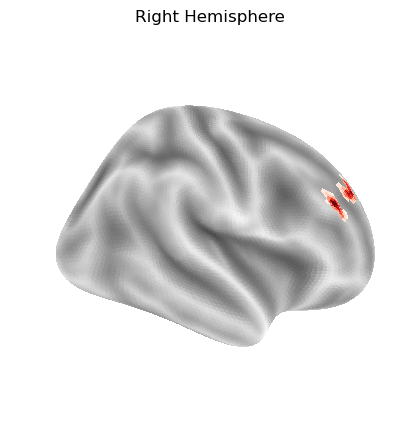

In [45]:
from pathlib import Path
# File directories
mdmr_dir = "/home/changbae/fmri_project/C-PAC/CPAC/bcb_mdmr/"
nas_dir = Path("/mnt/NAS2-2/data/")
MDMR_output_dir = nas_dir / "SAD_gangnam_MDMR"
fmri_prep_dir = nas_dir / "SAD_gangnam_resting_2" / "fMRIPrep_total"
seed_anal_dir = nas_dir / "SAD_gangnam_seed_based_analysis"
roi_filename = f"{MDMR_output_dir}/6mm/3/LSAS_avoidance/result/cluster_masks/MDMR_significant_aal(Frontal_Mid_R)_label(1).nii.gz"
brain_mask_filename = f"{mdmr_dir}/template/all_final_group_mask_6mm.nii.gz"
    
from nilearn import plotting, surface
from nilearn.datasets import fetch_surf_fsaverage
from nilearn.surface import vol_to_surf

# Load the fsaverage5 surface (used for plotting brain surfaces in Nilearn)
fsaverage = fetch_surf_fsaverage()
t_threshold = 0.0001
# Project the masked t-map onto the surface for both hemispheres
texture_left = vol_to_surf(roi_filename, fsaverage.pial_left,  interpolation='nearest',mask_img=brain_mask_filename)
texture_right = vol_to_surf(roi_filename, fsaverage.pial_right,  interpolation='nearest',mask_img=brain_mask_filename)


# Plot the surface with the projected texture
plotting.plot_surf(
    fsaverage.infl_left, texture_left, hemi='left', title='Left Hemisphere', 
    threshold=t_threshold, bg_map=fsaverage.sulc_left, cmap='Reds'
)


plotting.plot_surf(
    fsaverage.infl_right, texture_right, hemi='right', title='Right Hemisphere',
    threshold=t_threshold, bg_map=fsaverage.sulc_right, cmap='Reds'
)

# Show the plots
plotting.show()

In [11]:
import numpy as np

# Check for non-finite values in the textures
print("Left Hemisphere:", np.isnan(texture_left).any(), np.isinf(texture_left).any())
print("Right Hemisphere:", np.isnan(texture_right).any(), np.isinf(texture_right).any())


Left Hemisphere: False False
Right Hemisphere: False False
